In [13]:
import pandas as pd

In [59]:
BATCH = '10_04_2021__18_26_21'
NUM_OF_ITERATIONS = 11

DTYPES = ['json', 'yaml', 'toml', 'xml']
LANG_PREFIX = ['python', 'js']
PREFIX_TO_LANG = {
    'python':'python',
    'js':'javascript'
}

In [60]:
# ОПИСАНИЕ СТРУТКУР
desc_df = pd.read_csv(f'./desc/{BATCH}').set_index('id')
desc_df

,capacity,layers,arrays,strings_num,strings_min,strings_max,integers_num,integers_min,integers_max,floats_num,floats_min,floats_max
id,,,,,,,,,,,,
0,12,0,0,0,1,1,1,-16000,16000,1,-16000,16000
1,18,0,0,0,1,5,1,-16000,16000,2,-16000,16000
2,66,0,0,0,1,5,1,-16000,16000,10,-16000,16000
3,18,0,0,0,1,1,2,-16000,16000,1,-16000,16000
4,24,0,0,0,1,4,2,-16000,16000,2,-16000,16000
...,...,...,...,...,...,...,...,...,...,...,...,...
8395,5333,50,25,20,100,102,25,-16000,16000,2,-16000,16000
8396,5330,50,25,20,100,100,25,-16000,16000,10,-16000,16000
8397,5544,50,25,20,100,104,50,-16000,16000,1,-16000,16000


In [66]:
# Python stats
python_json = pd.read_csv(f'./stats/js_json_{BATCH}_{NUM_OF_ITERATIONS}.csv')
# python_json = pd.read_csv(f'./stats/python_json_{BATCH}_{NUM_OF_ITERATIONS}.csv').merge(desc_df, left_on='struct_id', right_on='id')
# python_xml = pd.read_csv(f'./stats/python_xml_{BATCH}_{NUM_OF_ITERATIONS}.csv').merge(desc_df, left_on='struct_id', right_on='id')
# python_yaml = pd.read_csv(f'./stats/yaml_{BATCH}_{NUM_OF_ITERATIONS}.csv').merge(desc_df, left_on='struct_id', right_on='id')
# python_toml = pd.read_csv(f'./stats/toml_{BATCH}_{NUM_OF_ITERATIONS}.csv').merge(desc_df, left_on='struct_id', right_on='id')

In [67]:
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib inline

np.random.seed(42)

(array([3.69672382e+07, 1.36419871e+07, 3.36104298e+06, 9.44310311e+05,
        4.59148960e+05, 1.80271924e+05, 9.43705372e+04, 7.25927209e+04,
        2.54074523e+04, 2.35926343e+04, 3.87161178e+04, 1.81481802e+04,
        5.44445407e+03, 5.44445407e+03, 1.45185442e+04, 1.02839688e+04,
        4.83951473e+03, 6.04939341e+02, 3.02469670e+03, 2.41975736e+03,
        0.00000000e+00, 6.04939341e+02, 0.00000000e+00, 1.20987868e+03,
        1.20987868e+03, 6.04939341e+02, 1.20987868e+03, 0.00000000e+00,
        6.04939341e+02, 6.04939341e+02, 0.00000000e+00, 1.20987868e+03,
        0.00000000e+00, 1.20987868e+03, 6.04939341e+02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 6.04939341e+02, 6.04939341e+02,
        0.00000000e+00, 0.00000000e+00, 6.04939341e+02, 6.04939341e+02,
        6.04939341e+02, 0.00000000e+00, 1.20987868e+03, 6.04939341e+02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.04939341e+02,
        0.00000000e+00, 0.00000000e+00, 1.20987868e+03, 0.000000

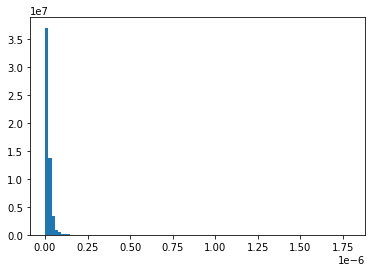

In [68]:
plt.hist(python_json.serialize, density=True, bins=100)

In [78]:
quantiles = python_json.quantile(0.96)
test_python_json = python_json[python_json.serialize<quantiles.serialize]
test_python_json = test_python_json[test_python_json.parse<quantiles.parse]
python_json.describe()

,Unnamed: 0,struct_id,capacity,serialize,parse,over
count,92400.000000,92400.000000,92400.000000,9.240000e+04,9.240000e+04,92400.000000
mean,46199.500000,4199.500000,808.708452,2.040872e-08,2.221918e-08,1.705345
std,26673.726774,2424.884235,908.581411,2.688388e-08,4.871359e-08,0.438603
min,0.000000,0.000000,12.000000,2.217448e-09,1.595135e-09,1.040609
25%,23099.750000,2099.750000,264.750000,1.035493e-08,1.124479e-08,1.392055
50%,46199.500000,4199.500000,502.000000,1.610092e-08,1.847354e-08,1.670126
75%,69299.250000,6299.250000,917.000000,2.351719e-08,2.636773e-08,1.919673
max,92399.000000,8399.000000,5544.000000,1.791242e-06,9.721943e-06,3.833333


(array([35681515.40152747, 30089461.51237005, 32188570.80250205,
        51932899.74646676, 46096841.11498503, 28782532.00211269,
        20309216.63509892, 11922807.06672117,  9793615.00013822,
         8092266.86530192,  7397020.47621361,  4836641.94716723,
         3101868.50516323,  2139219.65873326,  1474056.04609589]),
 array([2.21744804e-09, 5.62067766e-09, 9.02390729e-09, 1.24271369e-08,
        1.58303665e-08, 1.92335962e-08, 2.26368258e-08, 2.60400554e-08,
        2.94432850e-08, 3.28465147e-08, 3.62497443e-08, 3.96529739e-08,
        4.30562035e-08, 4.64594332e-08, 4.98626628e-08, 5.32658924e-08]),
 <a list of 15 Patch objects>)

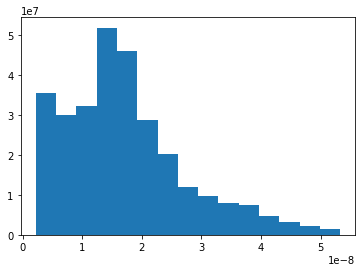

In [79]:
# PYTHON JSON СЕРИАЛИЗАЦИЯ
plt.hist(test_python_json.serialize, density=True, bins=15)

In [80]:
test_python_json.describe()

,Unnamed: 0,struct_id,capacity,serialize,parse,over
count,87909.000000,87909.000000,87909.000000,8.790900e+04,8.790900e+04,87909.000000
mean,47525.626113,4320.056115,844.012433,1.722472e-08,1.888438e-08,1.665344
std,26374.148563,2397.650470,915.537182,1.013879e-08,1.088307e-08,0.392107
min,93.000000,8.000000,53.000000,2.217448e-09,1.595135e-09,1.040609
25%,24783.000000,2253.000000,296.000000,9.952116e-09,1.063578e-08,1.373563
50%,48152.000000,4377.000000,530.000000,1.566903e-08,1.801961e-08,1.651926
75%,70324.000000,6393.000000,950.000000,2.212352e-08,2.483765e-08,1.872807
max,92399.000000,8399.000000,5544.000000,5.326589e-08,5.283975e-08,3.389831


(array([32148592.26810605, 24703304.61285125, 24220493.02518937,
        30869973.99457393, 44635098.84556828, 35851257.68520948,
        32444938.69087783, 20015037.60990011, 12040322.07576089,
        10528622.34611614,  8757203.27966017,  6659470.1746465 ,
         4411898.99070332,  3446275.81537957,  1981192.37695734]),
 array([1.59513518e-09, 5.01144286e-09, 8.42775055e-09, 1.18440582e-08,
        1.52603659e-08, 1.86766736e-08, 2.20929813e-08, 2.55092890e-08,
        2.89255966e-08, 3.23419043e-08, 3.57582120e-08, 3.91745197e-08,
        4.25908274e-08, 4.60071351e-08, 4.94234427e-08, 5.28397504e-08]),
 <a list of 15 Patch objects>)

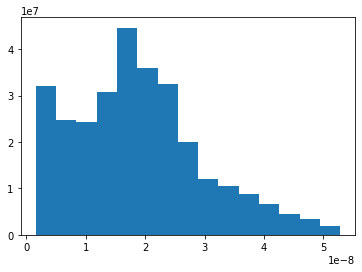

In [81]:
# PYTHON JSON ПАРСИНГ
plt.hist(test_python_json.parse, density=True, bins=15)

(array([0.83651425, 0.68071647, 0.75966854, 1.04046771, 1.17825251,
        0.74005763, 0.47610931, 0.25167334, 0.14831658, 0.10066934,
        0.07895207, 0.04982624, 0.02789107, 0.01125811, 0.00472114]),
 array([1.04060914, 1.1972239 , 1.35383865, 1.51045341, 1.66706817,
        1.82368293, 1.98029769, 2.13691244, 2.2935272 , 2.45014196,
        2.60675672, 2.76337148, 2.91998623, 3.07660099, 3.23321575,
        3.38983051]),
 <a list of 15 Patch objects>)

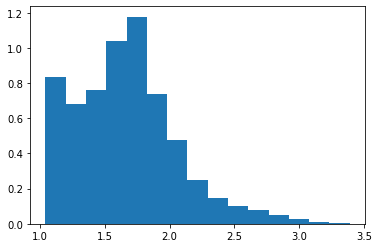

In [82]:
# PYTHON JSON УВЕЛИЧЕНИЕ СООБЩЕНИЯ
plt.hist(test_python_json.over, density=True, bins=15)

In [74]:
# PYTHON JSON ХАРАКТЕРИСТИКИ
test_python_json.describe()


,Unnamed: 0,struct_id,capacity,serialize,parse,over
count,89010.000000,89010.000000,89010.000000,8.901000e+04,8.901000e+04,89010.000000
mean,47225.973958,4292.815156,834.961656,1.765183e-08,1.929380e-08,1.675301
std,26412.475003,2401.134687,913.519715,1.080401e-08,1.143915e-08,0.404610
min,69.000000,6.000000,50.000000,2.217448e-09,1.595135e-09,1.040609
25%,24469.250000,2224.000000,288.000000,1.005358e-08,1.078390e-08,1.376509
50%,47654.500000,4332.000000,521.000000,1.576774e-08,1.812723e-08,1.656593
75%,70066.750000,6369.000000,942.000000,2.243996e-08,2.514587e-08,1.886147
max,92399.000000,8399.000000,5544.000000,5.843189e-08,5.899233e-08,3.542056


In [75]:

def stat_func():
    res_stat = []
    for lang_pref in LANG_PREFIX:
        for dtype in DTYPES:
            df = pd.read_csv(f'./stats/{lang_pref}_{dtype}_{BATCH}_{NUM_OF_ITERATIONS}.csv')
            quantiles = df.quantile(0.97)
            test_df = df[df.serialize<quantiles.serialize]
            test_df = test_df[test_df.parse<quantiles.parse]
            print(f"{PREFIX_TO_LANG[lang_pref]} ----------------- {dtype} ---------------------------------------------")
            mean = test_df.mean()
            std = test_df.std()
            res_stat.append({
                'lang':PREFIX_TO_LANG[lang_pref],
                'dtype': dtype,
                'serialize_mean':mean.serialize,
                'serialize_std':std.serialize,
                'parse_mean': mean.parse,
                'parse_std': std.parse,
                'over_mean':mean.over,
                'over_std':std.over,
            })
    return res_stat
            # print(test_df.mean())

            
            

In [76]:
data_stat = stat_func()

FileNotFoundError: [Errno 2] File ./stats/python_json_10_04_2021__18_26_21_11.csv does not exist: './stats/python_json_10_04_2021__18_26_21_11.csv'

In [77]:
stat = pd.DataFrame(data_stat)
stat

,lang,dtype,serialize_mean,serialize_std,parse_mean,parse_std,over_mean,over_std
0,python,json,4.458793e-08,2.479518e-08,3.403938e-08,1.881057e-08,1.883390,0.491009
1,python,yaml,5.273193e-06,2.279656e-06,1.066245e-05,5.294385e-06,2.517841,1.760760
2,python,toml,3.536953e-07,1.818670e-07,1.778822e-06,1.127705e-06,3.326839,2.928096
3,python,xml,7.483857e-06,3.671169e-06,6.236261e-07,3.123642e-07,2.247831,0.680214
4,javascript,json,1.773226e-08,1.091070e-08,2.004404e-08,1.200513e-08,1.676132,0.406391
5,javascript,yaml,1.351082e-07,6.025893e-08,1.272934e-07,6.291916e-08,2.713666,1.991896
6,javascript,toml,1.536338e-07,8.371636e-08,3.010702e-07,1.929151e-07,4.502373,4.880683
7,javascript,xml,2.410366e-07,1.339528e-07,3.459421e-07,1.729772e-07,2.263763,0.703586
